In [3]:
import pandas as pd
import seaborn as sns
import numpy as np


In [6]:
df = pd.read_csv('diabetes.csv')

In [7]:
#input data
x = df.drop('Outcome',axis = 1)
#output data
y = df['Outcome']


<Axes: xlabel='Outcome', ylabel='count'>

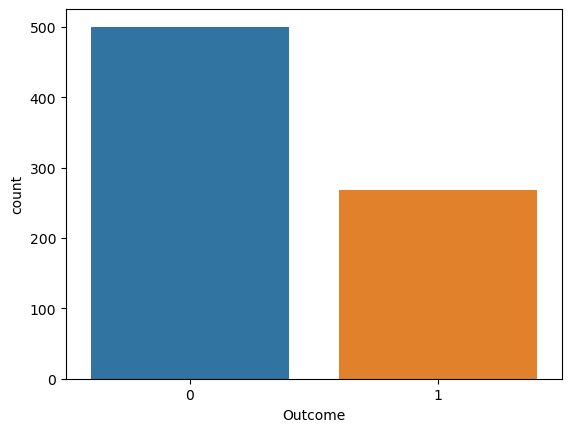

In [8]:
sns.countplot(x = y)

In [9]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [10]:
#Cross Validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,random_state = 0,test_size = 0.25)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

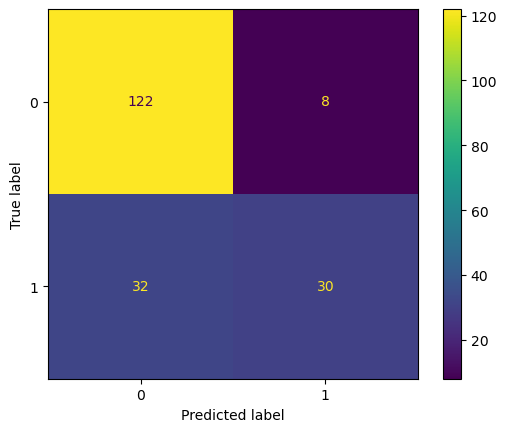

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [27]:
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       130
           1       0.79      0.48      0.60        62

    accuracy                           0.79       192
   macro avg       0.79      0.71      0.73       192
weighted avg       0.79      0.79      0.78       192



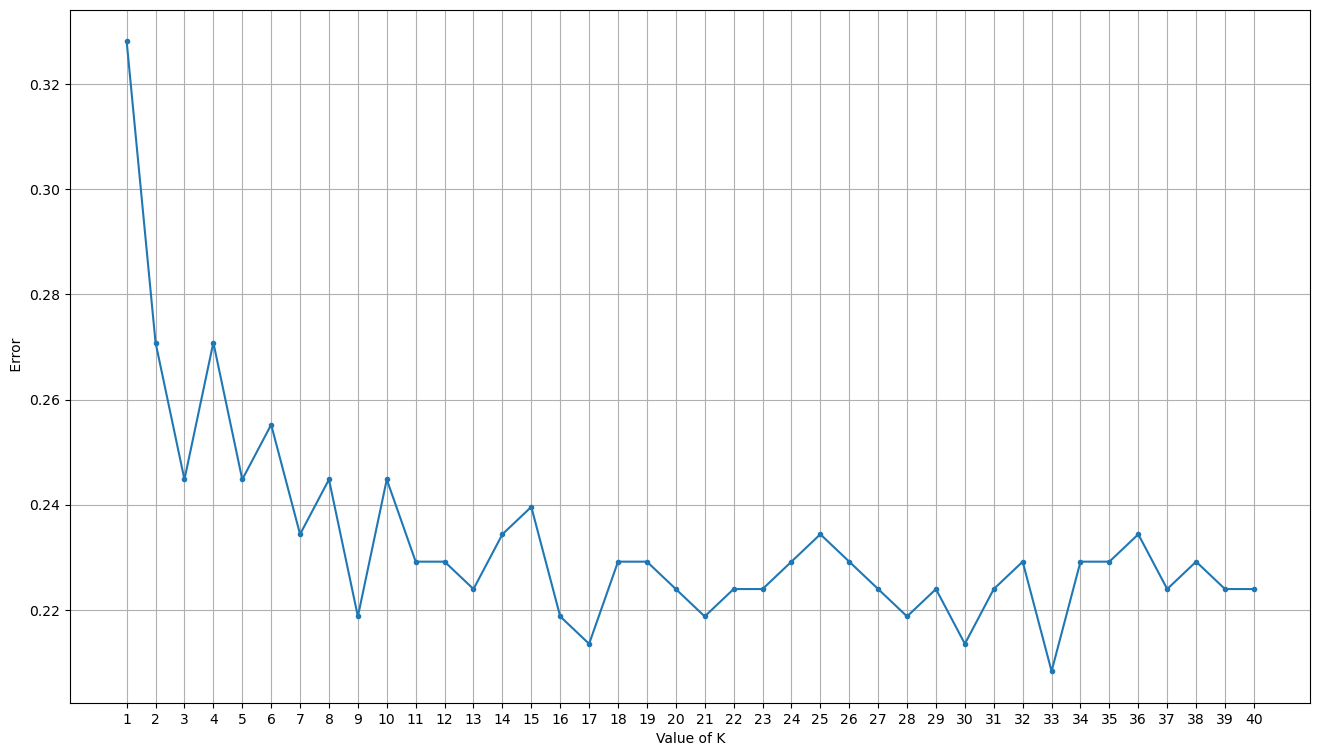

In [28]:
import matplotlib.pyplot as plt

# To find optimal value of K
error = []
for k in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    error.append(np.mean(pred != y_test))
    
# Then again train using optimal value of k
# PLot value of K to find minimal error rate
plt.figure (figsize=(16,9))
plt.ylabel( ' Error' )
plt.grid()
plt.xticks( range(1,41))
plt.xlabel('Value of K')
plt.plot(range(1,41), error,marker='.')
# Then again train and print